In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('movies.csv',index_col=0)

In [3]:
df.head()

,title,genre,wiki_plot,imdb_plot
rank,,,,
0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
title        100 non-null object
genre        100 non-null object
wiki_plot    100 non-null object
imdb_plot    90 non-null object
dtypes: object(4)
memory usage: 3.9+ KB


In [5]:
df['plot']=df['wiki_plot'].astype(str) + "\n" +df['imdb_plot'].astype(str)

In [6]:
df.drop(['wiki_plot','imdb_plot'],axis=1,inplace=True)

In [7]:
df.head()

,title,genre,plot
rank,,,
0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit..."
1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ..."
2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the..."
3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight..."
4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...


In [8]:
eval(df['genre'][1])

[' Crime', ' Drama']

In [9]:
a=''
for i,row in df.iterrows():
    a=''.join(eval(row['genre'])).strip()
    row['plot']=a+' '+row['plot']

In [10]:
df.drop('genre',axis=1,inplace=True)

In [11]:
df.head()

,title,plot
rank,,
0,The Godfather,Crime Drama On the day of his only daughter's ...
1,The Shawshank Redemption,"Crime Drama In 1947, banker Andy Dufresne is c..."
2,Schindler's List,"Biography Drama History In 1939, the Germans m..."
3,Raging Bull,Biography Drama Sport In a brief scene in 1964...
4,Casablanca,Drama Romance War It is early December 1941. A...


In [12]:
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")

In [15]:
# https://gist.github.com/sebleier/554280
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [16]:
# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [y for x in nltk.sent_tokenize(text) for y in nltk.word_tokenize(x)]
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stem the filtered_tokens
    stems = [stemmer.stem(word) for word in filtered_tokens if word not in stopwords]
    
    return (' '.join(stems))


In [17]:
df['plot']=df['plot'].apply(tokenize_and_stem)

In [18]:
df['plot'].head()

rank
0    crime drama on day daughter 's wed vito corleo...
1    crime drama in banker andi dufresn convict mur...
2    biographi drama histori in german move polish ...
3    biographi drama sport in brief scene age overw...
4    drama romanc war it earli decemb american expa...
Name: plot, dtype: object

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2,ngram_range=(1,3))

In [20]:
# Fit and transform the tfidf_vectorizer with the "plot" of each movie
# to create a vector representation of the plot summaries
tfidf_matrix = tfidf_vectorizer.fit_transform(df["plot"])

print(tfidf_matrix.shape)

(100, 648)


In [21]:
# Importing cosine_similarity to calculate similarity of movie plots
from sklearn.metrics.pairwise import cosine_similarity

# Calculating the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

In [22]:
from scipy.cluster.hierarchy import linkage,dendrogram

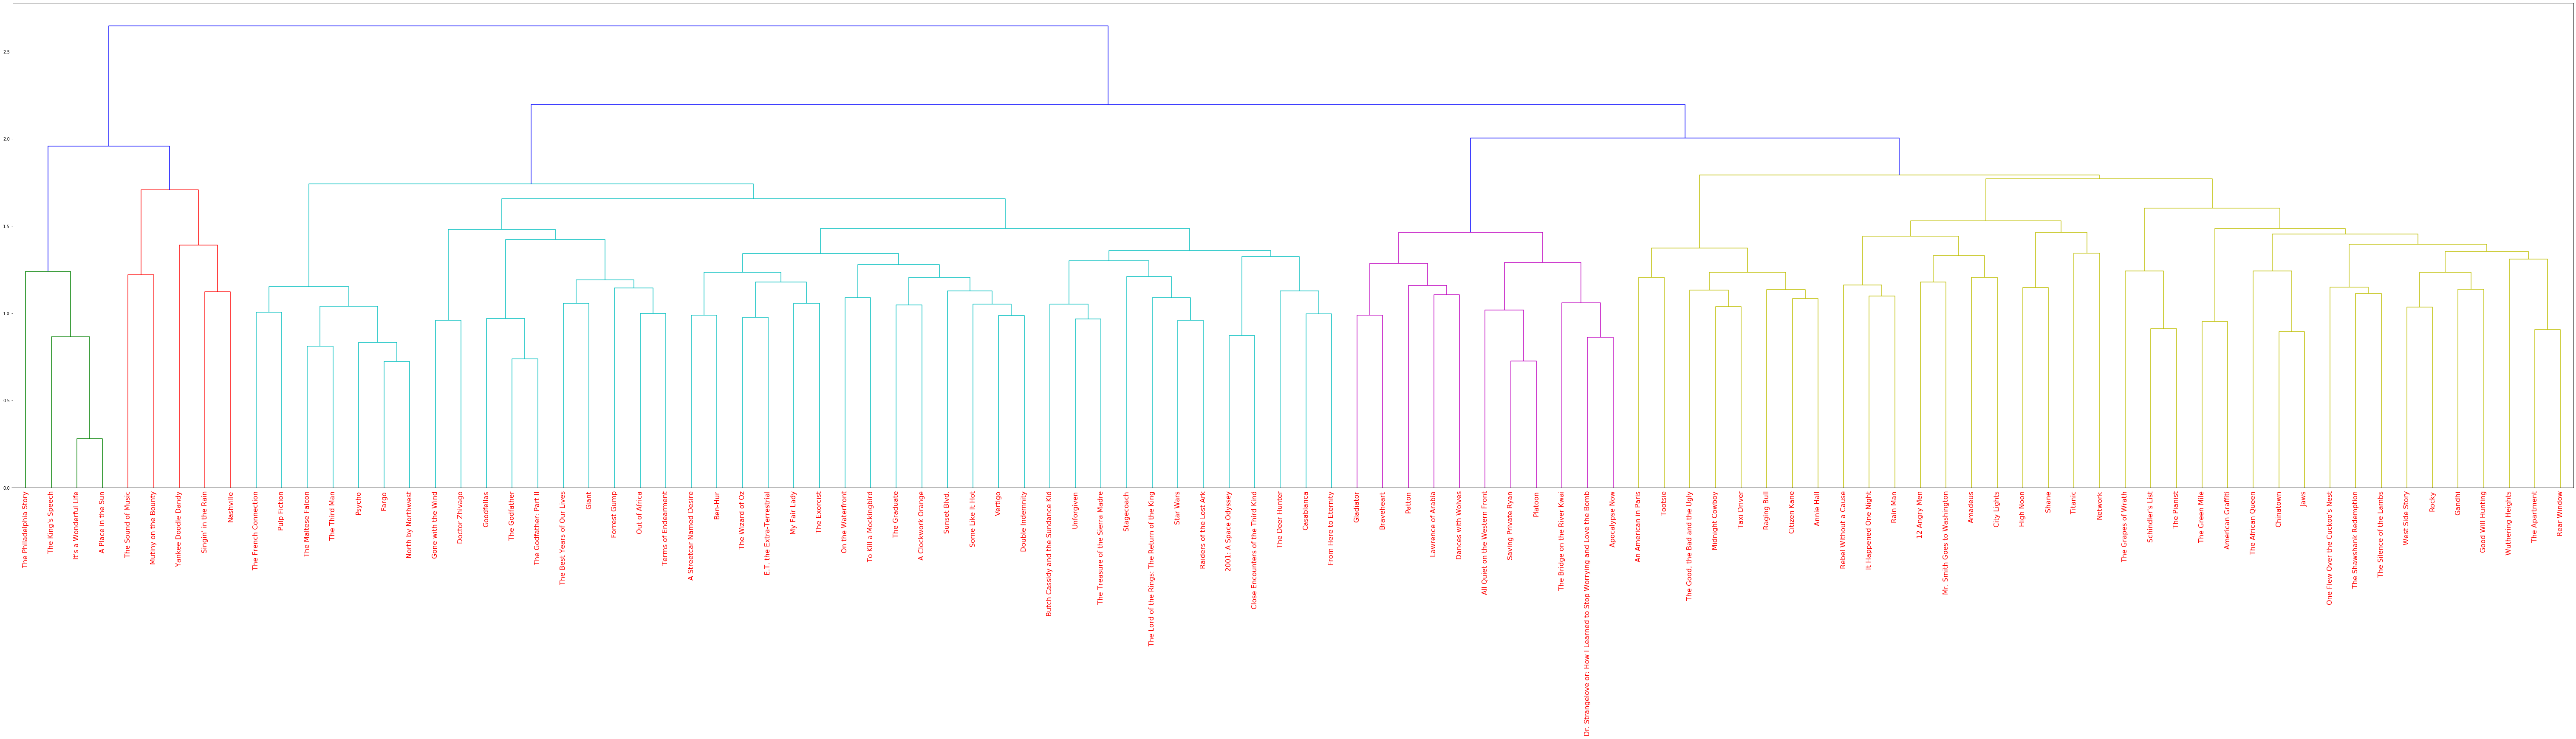

In [25]:
mergings = linkage(similarity_distance, method='complete')

dendrogram_ = dendrogram(mergings,
               labels=[x for x in df["title"]],
               leaf_rotation=90,
               leaf_font_size=16,
)

# Adjusting the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

plt.show()